<a href="https://colab.research.google.com/github/peludev/data-science-I/blob/main/Proyecto_ParteIII_Acosta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predicción de la Aparición de la Diabetes**








---



**Resumen (Abstract)**

La diabetes es una enfermedad crónica que impacta a millones de personas cada año, en la cual los individuos pierden su capacidad para regular los niveles de glucosa en la sangre. El objetivo del presente trabajo fue predecir la aparición de la diabetes utilizando dos algoritmos de aprendizaje automático supervisado: bosque aleatorio y regresión logística. Entre un grupo de distintos posibles factores de riesgo que contenía el conjunto de datos utilizado, se identificaron aquellos que tienen una relación directa con el diagnóstico de esta enfermedad. La exactitud y precisión obtenidas para el modelo de regresión logística fueron superiores a la del bosque aleatorio en un 4% y 2%, respectivamente.

---




## Planteamiento del problema

**Preguntas de interés**

En este proyecto se busca dar respuesta a los siguientes interrogantes:

*   ¿Se puede obtener un subconjunto de factores de riesgo para predecir si un individuo tiene diabetes o posee un riesgo alto de desarrollarla?
*   ¿Qué factores de riesgo son más predictivos del riesgo de diabetes?
*   ¿Con qué exactitud se puede obtener una predicción de si un individuo tiene diabetes?


**Planteamiento de hipótesis**

**Hipótesis 1:** Las personas con un índice de masa corporal más alto (BMI) tienen una mayor probabilidad de tener diabetes.

**Hipótesis 2:** La hipertensión está significativamente asociada con una mayor prevalencia de diabetes.

**Hipótesis 3:** El riesgo de padecer diabetes aumenta con la edad.

## Objetivo general





Predecir la aparición de diabetes en pacientes mediante la implementación de un algoritmo de aprendizaje automático supervisado, teniendo en cuenta diferentes posibles factores de riesgo como la edad, sexo, índice de masa corporal, actividad física, entre otras.

**Justificación de la elección**: Debido a la naturaleza del problema, se tiene una tarea de clasificación binaria, *i.e.* el propósito es clasificar a los individuos en dos grupos: con o sin diabetes. Ésta es una tarea ideal para algoritmos de aprendizaje supervisado, ya que se cuenta con datos con una etiqueta clara (la presencia de diabetes), por lo que el modelo puede aprender a partir de patrones y relaciones en estos datos, para luego generalizar su conocimiento y predecir la diabetes en nuevos individuos.

## Descripción contextual

**Contexto comercial**

De acuerdo con datos de la OPS, entre un 30 y un 40% de personas con diabetes están sin diagnosticar. Esto ocasiona que los modelos predictivos del riesgo de diabetes sean herramientas de gran interés muy importantes para la salud de las personas, puesto que un diagnóstico temprano puede aumentar la eficacia del tratamiento y mejorar el estilo de vida del paciente, con estrategias como perder peso, comer sano y mantenerse activo.

**Problema comercial**

La diabetes produce graves efectos económicos tanto para las personas y sus familias, como para las economías nacionales. Cuando los pacientes que dependen de la insulina para sobrevivir no pueden acceder a ésta a un costo asequible, pueden terminar perdiendo su vida. La prevalencia de esta enfermedad ha aumentado más rápidamente en los países de ingresos bajos y medianos que en los países de ingresos altos. Alrededor de 62 millones de personas en las Américas (y 422 millones a nivel mundial) tienen diabetes. El número de casos se ha triplicado en la región desde 1980 y se estima que alcanzará la marca de 109 millones para el 2040.

**Contexto analítico**

Se proporciona un archivo .csv que reporta diferentes variables que pueden incidir en la aparición de un diagnóstico de diabetes. Se debe:

*   Leer, transformar y preparar datos para su posterior visualización.
*   Realizar visualizaciones y análisis de los datos con el fin de encontrar patrones.
*   Construir un modelo predictivo de la diabetes.

## Análisis Exploratorio de Datos

In [ ]:
# Montar Google Drive
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/entrega-final-ds-I'

Mounted at /content/gdrive
/content/gdrive/MyDrive/entrega-final-ds-I


In [ ]:
# Importar librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar dataset
df = pd.read_csv('diabetes_data.csv', sep = ',')

In [ ]:
# Visualizar los primeros registros del dataset
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Verificar los tipos de datos
df.dtypes

,0
Age,float64
Sex,float64
HighChol,float64
CholCheck,float64
BMI,float64
Smoker,float64
HeartDiseaseorAttack,float64
PhysActivity,float64
Fruits,float64
Veggies,float64


In [ ]:
# Examinar las dimensiones del dataset
df.shape

(70692, 18)

En el presente trabajo se utilizará un conjunto de datos que consta de 70692 filas y 18 columnas. De las 18 variables que se reportan, 3 se podrían considerar variables objetivo: Diabetes (Diabetes), Hipertensión (HighBP) y Accidente Cerebrovascular (Stroke). Tal y como se ha mencionado anteriormente, para este proyecto es de interés la Diabetes.

**Descripción de las variables**


El dataset contiene las siguientes columnas relacionadas con factores que podrían influir en el diagnóstico de la diabetes:

Age: Edad del individuo. Se encuentra dividida en trece categorías:
 1 = 18-24 / 2 = 25-29 / 3 = 30-34 / 4 = 35-39 / 5 = 40-44 / 6 = 45-49 /
 7 = 50-54 / 8 = 55-59 / 9 = 60-64 / 10 = 65-69 / 11 = 70-74 / 12 = 75-79 /
 13 = 80 o mayor

Sex: Sexo (0: Femenino, 1: Masculino).

HighChol: Si la persona tiene colesterol alto (0: No, 1: Sí).

CholCheck: Si la persona ha revisado su colesterol en los últimos 5 años (0: No, 1: Sí).

BMI: Índice de Masa Corporal.

Smoker: Si la persona fuma (0: No, 1: Sí).
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

HeartDiseaseorAttack: Si la persona ha sufrido alguna enfermedad cardíaca o infarto (0: No, 1: Sí).

PhysActivity: Si realiza actividad física regularmente (0: No, 1: Sí).

Fruits: Si consume frutas regularmente (0: No, 1: Sí).

Veggies: Si consume verduras regularmente (0: No, 1: Sí).

HvyAlcoholConsump: Consumo elevado de alcohol (0: No, 1: Sí).

GenHlth: Estado general de salud (Escala de 1 a 5, donde 1 es excelente y 5 es pobre).

MentHlth: Días de mala salud mental en los últimos 30 días.

PhysHlth: Días de mala salud física en los últimos 30 días.

DiffWalk: Dificultad para caminar o subir escaleras (0: No, 1: Sí).

Stroke: Si ha tenido un accidente cerebrovascular (0: No, 1: Sí).

HighBP: Si sufre de hipertensión *i.e*. presión arterial alta (0: No, 1: Sí).

***Diabetes: Si tiene diabetes (0: No, 1: Sí). Corresponde a la variable objetivo.***

**Manejo de valores faltantes**

In [ ]:
# Inspeccionar la cantidad de valores nulos por columna
df.isnull().sum()

,0
Age,0
Sex,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0
Veggies,0


El conjunto de datos utilizado no tiene valores nulos o faltantes.

**Resumen estadístico de cada campo**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0


## Visualizaciones

**Visualizaciones usando la librería Matplotlib**

A continuación se presentan algunos gráficos para observar cómo están distribuidos los datos reportados en el dataset.

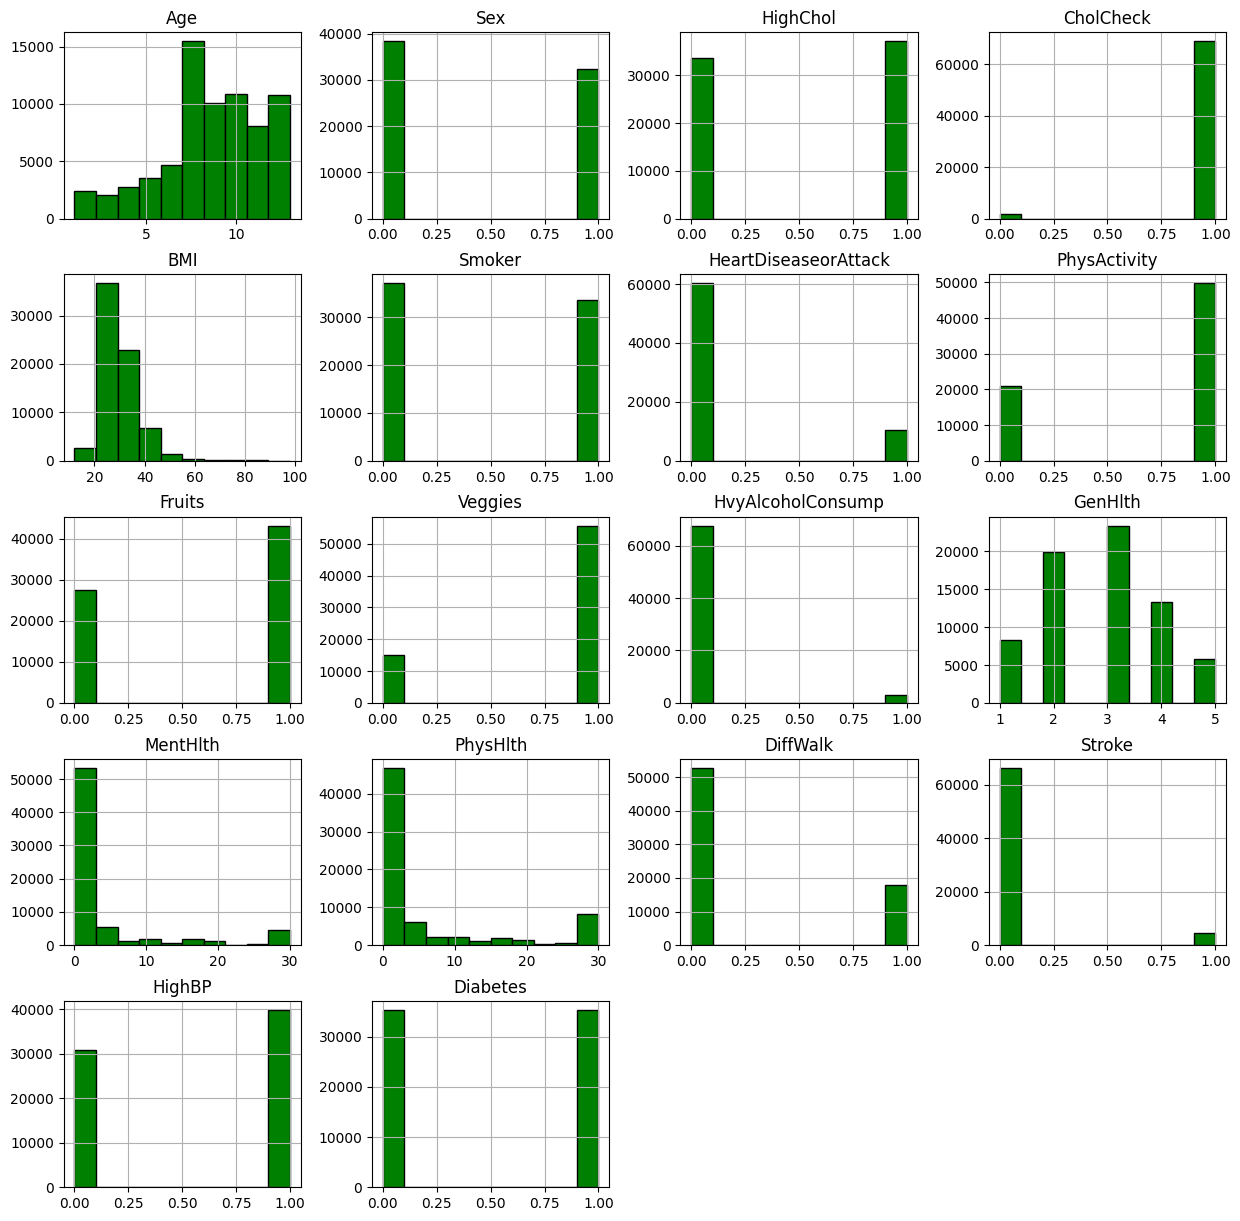

In [ ]:
df.hist(figsize=(15,15), edgecolor='black', color='green')
plt.show()

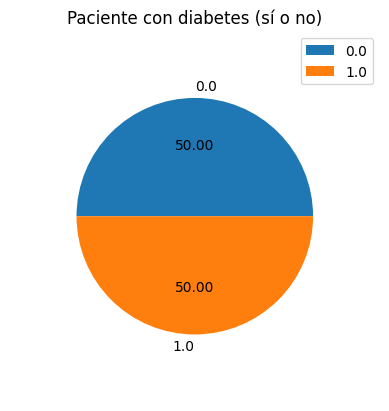

In [ ]:
plt.pie(df["Diabetes"].value_counts(),labels = df["Diabetes"].unique(), autopct='%.2f', radius = 0.8)
plt.title("Paciente con diabetes (sí o no)")
plt.legend()
plt.show()

La figura anterior muestra que el porcentaje de pacientes que participaron del estudio que poseen un diagnóstico de diabetes corresponde al 50%.

**Visualizaciones usando la librería Seaborn**

Las siguientes tres figuras muestran la distribución de la diabetes con respecto a la hipertensión, el índice de masa corporal, y el estado general de salud, respectivamente.

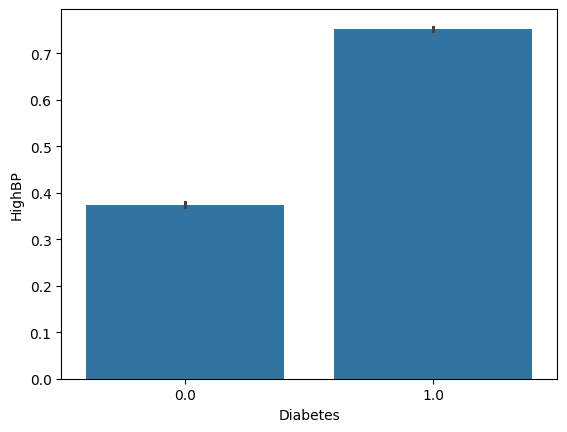

In [ ]:
sns.barplot(x=df['Diabetes'],y=df['HighBP'])
plt.show()

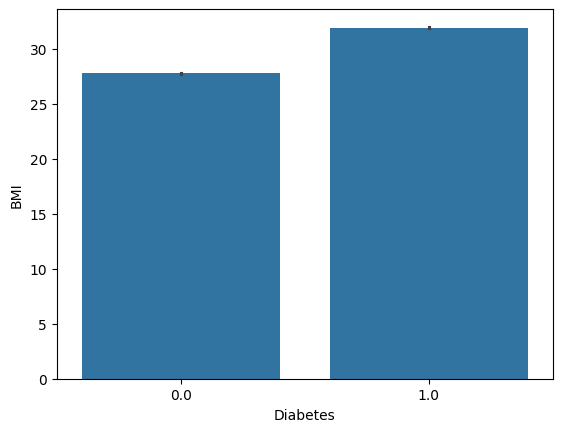

In [ ]:
sns.barplot(x=df['Diabetes'],y=df['BMI'])
plt.show()

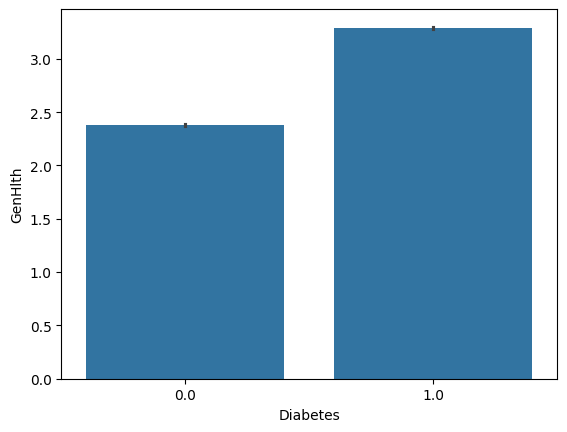

In [ ]:
sns.barplot(x=df['Diabetes'],y=df['GenHlth'])
plt.show()

## Análisis de correlación

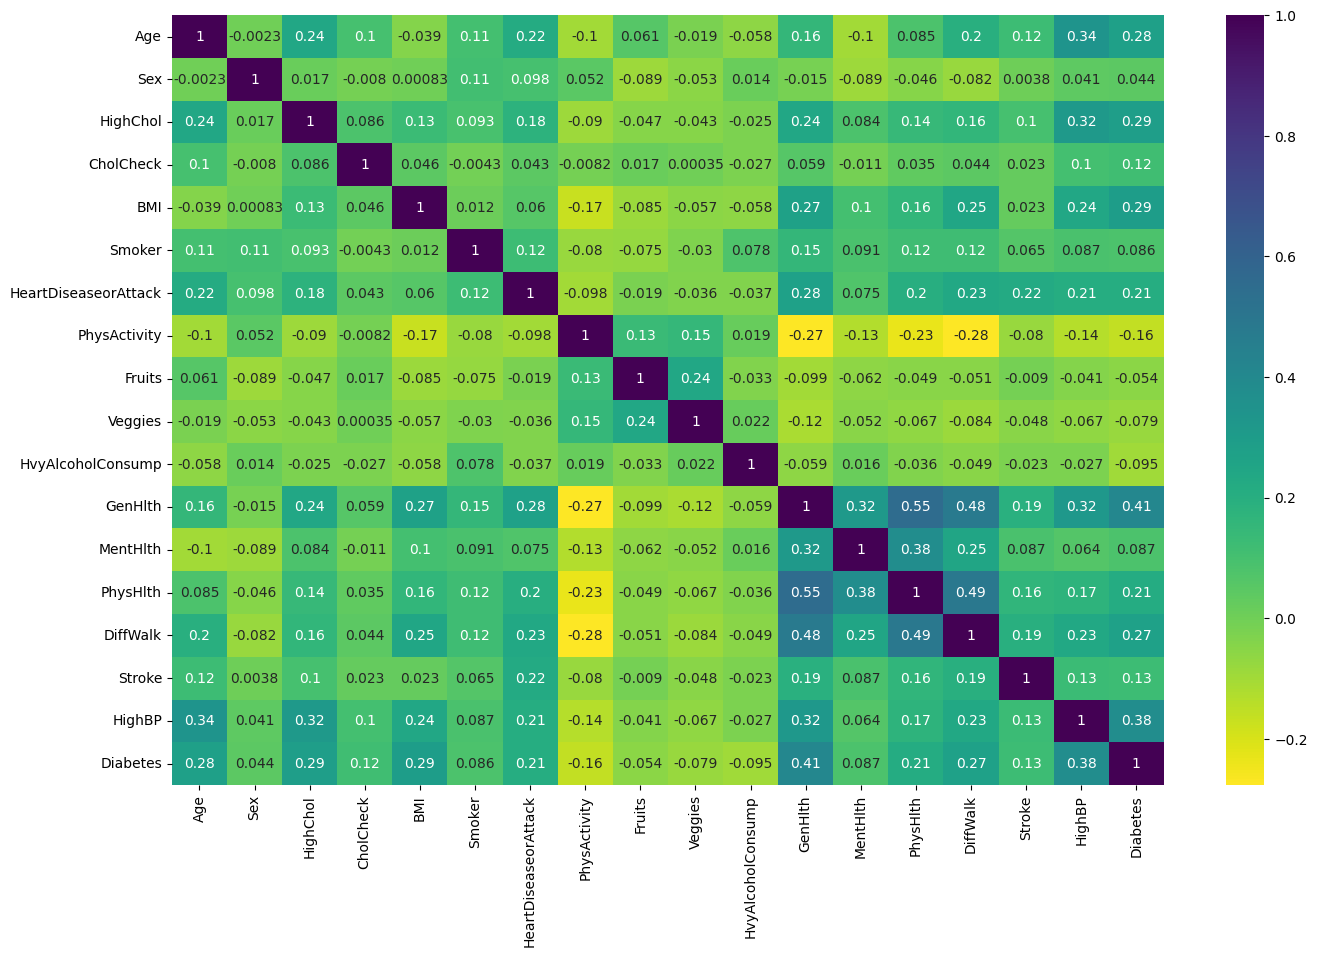

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True, cmap="viridis_r")
plt.show()

El mapa de calor anterior indica cómo están correlacionadas todas las variables del conjunto de datos. Se puede apreciar que las variables que presentan una mayor correlación con la diabetes son el estado de salud general (GenHlth) y  la hipertensión (HighBP), con un valor de 0,41 y 0,38, respectivamente. Esto sugiere que a medida que las personas reportan peores estados de salud general, hay una mayor probabilidad de tener diabetes.  Del mismo modo, las personas con presión arterial alta parecen tener una mayor probabilidad de padecer diabetes. Con esto presente, se puede esperar que **las variables GenHlth y HighBP sean las que mayor influencia tengan en el modelo de aprendizaje autómatico que se utilice**.

Por otro lado, la matriz de correlación también permite inferir que las personas que realizan más actividad física (PhysActivity) tienen una menor probabilidad de tener diabetes, lo que está en concordancia  con estudios que indican que el ejercicio regular puede ayudar a prevenir esta enfermedad. El consumo de frutas y verduras muestra una ligera correlación negativa con la diabetes, lo que sugiere que estos hábitos alimenticios pueden estar asociados con un menor riesgo de diabetes. Adicionalmente, el consumo de alcohol frecuente (HvyAlcoholConsump) muestra una correlación negativa débil con la diabetes.

## Conclusiones preliminares


*   A partir del análisis exploratorio se comprobó que no hay valores faltantes en ninguna de las columnas, lo que asegura que el dataset está completamente listo para su análisis sin necesidad de imputación o eliminación de datos.
*   El consumo de cigarrillos y la presencia de condiciones como colesterol alto o hipertensión parecen estar equilibrados, lo que ofrece la posibilidad de hacer un análisis robusto de las relaciones entre estas variables y la prevalencia de diabetes.
*   Factores como la edad, el colesterol alto, el índice de masa corporal, la dificultad para caminar, la hipertensión, y el estado general de salud parecen ser los indicadores más importantes de la prevalencia de diabetes.
*   Hábitos saludables como el consumo de frutas y verduras y la actividad física muestran una correlación negativa moderada o débil con la diabetes.
*   Las variables relacionadas con el estilo de vida, como el consumo de alcohol y cigarrillos, tienen una correlación baja con la diabetes en este dataset, lo que indica que podrían tener una menor influencia en la probabilidad de diabetes.

## Selección de características

Para seleccionar las variables clave y determinar si se pueden descartar algunas en un análisis de datos, es posible utilizar varias técnicas estadísticas y de aprendizaje automático. Una de ellas es un **análisis de correlación**, el cual, como se mostró previamente, permite ver qué tan relacionadas están las variables entre sí, en especial con la variable objetivo (en este caso, la diabetes). Factores como el estado general de salud, la presión arterial alta, el índice de masa corporal (BMI) y la edad han mostrado correlaciones relativamente fuertes con la diabetes, mientras que otras como el sexo, el consumo de frutas, verduras y alcohol han mostrado correlaciones bajas.




Otra técnica es un **análisis de importancia de las variables**, el cual se implementará a continuación. Ésta consiste en entrenar un modelo (como un árbol de decisión o un bosque aleatorio) y luego obtener un ranking de las variables más importantes; las variables con muy baja importancia se pueden descartar.

**Justificación de la elección**: El dataset contiene múltiples variables, y no todas aportan de manera significativa a la predicción de la diabetes. La eliminación de variables menos relevantes puede simplificar el modelo.  El análisis de importancia de variables podría respaldar la eliminación de variables con baja correlación o redundantes, lo que permite construir modelos que se alineen mejor con la literatura médica y los conocimientos existentes sobre factores de riesgo de la diabetes. Mientras que el análisis de correlación ofrece una vista lineal de la relación entre variables, el análisis de importancia de variables permite capturar relaciones no lineales. Esto es especialmente útil si existen interacciones complejas entre variables en el dataset que pueden influir en la probabilidad de diabetes de maneras que no se pueden detectar fácilmente con la correlación simple.

In [ ]:
# Generar copia del dataset
df_diabetes = df.copy()

In [ ]:
# Separar datos en X e y
X = df_diabetes.drop("Diabetes", axis =1)
y = df_diabetes["Diabetes"]

In [ ]:
# Hacer un muestreo de los datos de entrada del modelo
X.sample(7)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
503,11.0,1.0,0.0,1.0,28.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
6553,7.0,0.0,1.0,1.0,30.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,20.0,1.0,0.0,0.0,1.0
59418,12.0,1.0,0.0,1.0,24.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0,0.0,15.0,1.0,0.0,1.0
68188,11.0,0.0,1.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0
49892,9.0,0.0,0.0,1.0,41.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0,10.0,1.0,0.0,0.0
30269,6.0,1.0,0.0,1.0,34.0,1.0,0.0,1.0,0.0,1.0,1.0,5.0,15.0,30.0,0.0,0.0,1.0
31477,8.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0


**Entrenamiento de bosque aleatorio utilizando todos los campos**

In [ ]:
# Importar la librería necesaria para dividir los datos
from sklearn.model_selection import train_test_split

# Dividir los datos: 70% para entrenamiento(train) y 30% para prueba(test)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)

In [ ]:
# Importar la librería requerida para generar el modelo de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
random_forest = RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
# Entrenamiento
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
# Cálculo de las predicciones en los subconjuntos de entrenamiento y prueba
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

**Evaluación de bosque aleatorio utilizando todos los campos**

In [ ]:
# Importar librería para calcular la métrica de exactitud
from sklearn.metrics import accuracy_score

# Calcular la exactitud del subconjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calcular la exactitud del subconjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)

print('La exactitud en el entrenamiento es:', train_accuracy)
print('La exactitud en la prueba es:', test_accuracy)

La exactitud en el entrenamiento es: 0.9602699862581845
La exactitud en la prueba es: 0.7060543191248585


In [ ]:
# Examinar la importancia de las características (feature importances)
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": random_forest.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df

,feature,importance
4,BMI,0.225842
0,Age,0.153687
11,GenHlth,0.113183
13,PhysHlth,0.087982
12,MentHlth,0.067870
16,HighBP,0.064124
2,HighChol,0.053289
5,Smoker,0.034925
8,Fruits,0.034620
1,Sex,0.031017


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'BMI'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'GenHlth'),
  Text(3, 0, 'PhysHlth'),
  Text(4, 0, 'MentHlth'),
  Text(5, 0, 'HighBP'),
  Text(6, 0, 'HighChol'),
  Text(7, 0, 'Smoker'),
  Text(8, 0, 'Fruits'),
  Text(9, 0, 'Sex'),
  Text(10, 0, 'Veggies'),
  Text(11, 0, 'PhysActivity'),
  Text(12, 0, 'DiffWalk'),
  Text(13, 0, 'HeartDiseaseorAttack'),
  Text(14, 0, 'Stroke'),
  Text(15, 0, 'HvyAlcoholConsump'),
  Text(16, 0, 'CholCheck')])

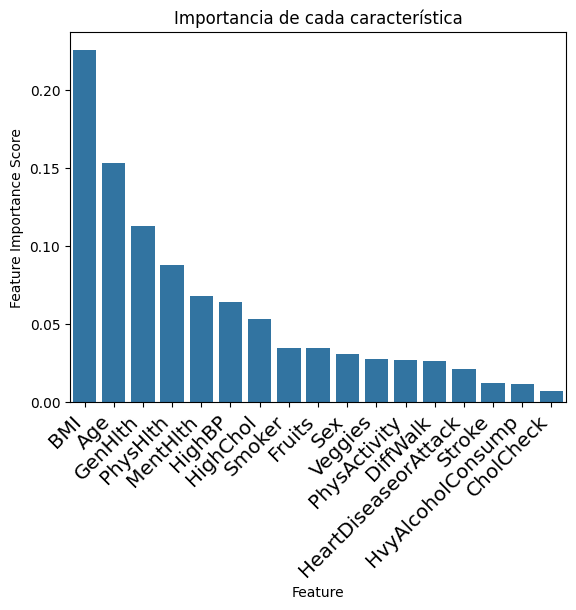

In [ ]:
# Visualizar la importancia de las características a través de un gráfico de barras
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel("Feature")
plt.ylabel("Feature Importance Score")
plt.title("Importancia de cada característica")
plt.xticks(rotation=45, horizontalalignment = "right", fontweight="light", fontsize="x-large")

Se excluirá del modelo la variable correspondiente al consumo de alcohol, ya que presenta un bajo valor de correlación con la diabetes, así como también un pequeño puntaje de importancia en el modelo de bosque aleatorio que se acaba de construir. Este proceso puede repetirse de manera iterativa con el fin de aumentar el rendimiento y la calidad de los modelos de aprendizaje automático, al reducirse la dimensionalidad del espacio de características, incrementando la velocidad del algoritmo de aprendizaje, y mejorando con ello la exactitud de la predicción.

## Elección de algoritmos aprendizaje automático

Con el fin de desarrollar un modelo para la predicción de la diabetes, serán implementados los algoritmos de bosque aleatorio y regresión logística.

*   Los bosques aleatorios están basados en árboles de decisión que pueden dividir los datos de manera jerárquica y capturar relaciones no lineales entre las variables. Dado que las interacciones entre factores de salud pueden ser complejas, son una buena opción para explorar esas relaciones. Adicionalmente, como se mostró anteriormente al hacer la selección de características, los bosque aleatorios ofrecen una métrica de importancia de las variables, lo que permite entender mejor las características más relevantes del modelo e identificar cuáles factores de salud y estilo de vida son más predictivos de la diabetes.
*   La regresión logística es un algoritmo que ofrece la ventaja de ser rápido de entrenar y fácil de interpretar. Al ser un modelo más sencillo, tiene menos riesgo de sobreajuste en comparación con modelos no lineales más complejos.

## Entrenamiento de un modelo utilizando el método de bosque aleatorio

In [ ]:
# Excluir el campo asociado al consumo de alcohol de los datos de entrada del modelo
X1 = df_diabetes.drop(["Diabetes", "HvyAlcoholConsump"], axis =1)
y1 = df_diabetes["Diabetes"]

In [ ]:
# Comprobar los campos que harán parte del modelo
X1.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP'],
      dtype='object')

In [ ]:
# Hacer un muestreo de los datos de entrada del modelo
X1.sample(7)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
58011,13.0,1.0,0.0,1.0,27.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,10.0,0.0,0.0,0.0
16139,10.0,0.0,1.0,1.0,34.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0
9279,6.0,1.0,0.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,10.0,0.0,0.0,1.0
15396,13.0,0.0,0.0,1.0,25.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,14.0,0.0,0.0,1.0
18278,10.0,0.0,0.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
47966,11.0,1.0,0.0,1.0,35.0,1.0,0.0,1.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0
21755,7.0,0.0,0.0,1.0,25.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Dividir los datos: 70% para entrenamiento(train) y 30% para prueba(test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.30, random_state=0)

In [ ]:
# Creación del modelo
random_forest1 = RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
# Entrenamiento
random_forest1.fit(X_train1,y_train1)

RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
# Cálculo de las predicciones en los subconjuntos de entrenamiento y prueba
y_train_pred1 = random_forest1.predict(X_train1)
y_test_pred1 = random_forest1.predict(X_test1)

## Evaluación del modelo de bosque aleatorio

<Figure size 900x900 with 0 Axes>

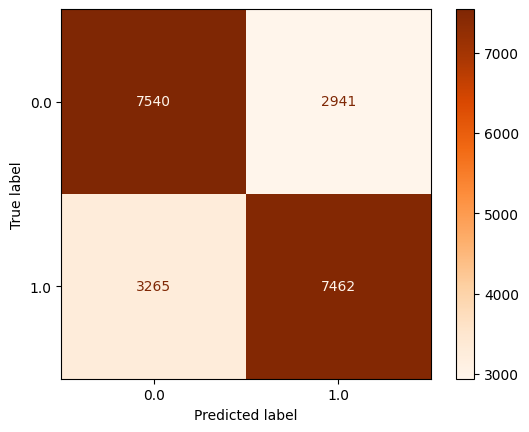

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig = plt.figure(figsize=(9,9))
cm_rf = confusion_matrix(y_test1, y_test_pred1, labels=random_forest1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf, display_labels=random_forest1.classes_)
disp.plot(cmap='Oranges')
plt.show()

In [ ]:
# Importar librería para cálcular la métrica de precisión
from sklearn.metrics import precision_score

# Calcular la exactitud y precisión en el subconjunto de entrenamiento
train_accuracy1 = accuracy_score(y_train1, y_train_pred1)
train_precision1 = precision_score(y_train1, y_train_pred1)

# Calcular la exactitud y precisión en el subconjunto de prueba
test_accuracy1 = accuracy_score(y_test1, y_test_pred1)
test_precision1 = precision_score(y_test1, y_test_pred1)

print('La exactitud en el entrenamiento es:', train_accuracy1)
print('La precisión en entrenamiento es:', train_precision1)
print('')
print('La exactitud en la prueba es:', test_accuracy1)
print('La precisión en la prueba es:', test_precision1)

La exactitud en el entrenamiento es: 0.9588553876000323
La precisión en entrenamiento es: 0.9672280382339554

La exactitud en la prueba es: 0.707374575631837
La precisión en la prueba es: 0.7172930885321542


Este modelo alcanzó una exactitud de 0.707 y una precisión de 0.717. Esto quiere decir que el bosque aleatorio predice correctamente en poco más del 70% de los casos, mientras que su precisión superior al 71% indica que también es bastante eficaz en sus predicciones positivas. Se puede decir que el modelo ha funcionado razonablemente bien; lograr un 70% en exactitud y precisión en un problema de clasificación de salud es aceptable y muestra que el modelo capta algunos patrones relevantes.

In [ ]:
# Examinar la importancia de las características (feature importances)
feature_importances_df1 = pd.DataFrame(
    {"feature": list(X1.columns), "importance": random_forest1.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df1

,feature,importance
4,BMI,0.213181
0,Age,0.148685
10,GenHlth,0.106763
15,HighBP,0.103945
12,PhysHlth,0.087235
11,MentHlth,0.068118
2,HighChol,0.042656
13,DiffWalk,0.034566
5,Smoker,0.034379
8,Fruits,0.033385


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'BMI'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'GenHlth'),
  Text(3, 0, 'HighBP'),
  Text(4, 0, 'PhysHlth'),
  Text(5, 0, 'MentHlth'),
  Text(6, 0, 'HighChol'),
  Text(7, 0, 'DiffWalk'),
  Text(8, 0, 'Smoker'),
  Text(9, 0, 'Fruits'),
  Text(10, 0, 'Sex'),
  Text(11, 0, 'Veggies'),
  Text(12, 0, 'PhysActivity'),
  Text(13, 0, 'HeartDiseaseorAttack'),
  Text(14, 0, 'Stroke'),
  Text(15, 0, 'CholCheck')])

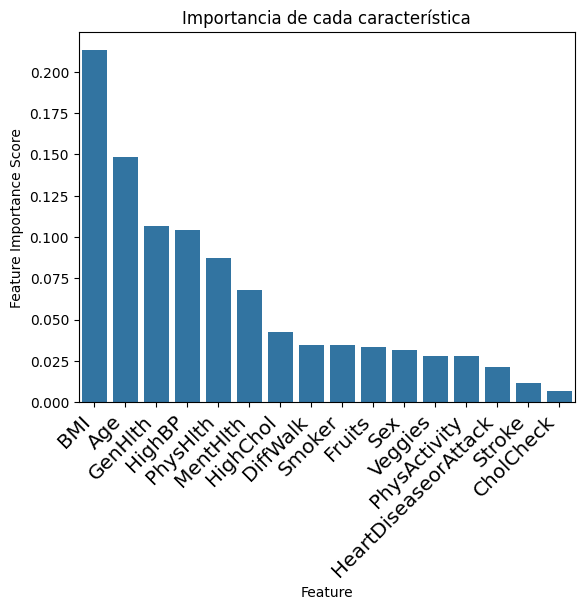

In [ ]:
sns.barplot(x=feature_importances_df1.feature, y=feature_importances_df1.importance)
plt.xlabel("Feature")
plt.ylabel("Feature Importance Score")
plt.title("Importancia de cada característica")
plt.xticks(rotation=45, horizontalalignment = "right", fontweight="light", fontsize="x-large")

## Entrenamiento de un modelo utilizando el método de regresión logística

En el conjunto de datos original, muchos campos (columnas) solamente toman valores de 0 ó 1. Sin embargo, existen algunos otros con escalas muy diferentes.

Age: [1, 13]

BMI: [12, 98]

GenHlth: [1, 5]

MentHlth, PhysHlth : [0, 30]

La regresión logística es un método sensible a la escala de los datos, por lo que es necesario realizar un escalamiento. El escalamiento consiste en hacer que cada campo del conjunto de datos tenga aproximadamente el mismo rango de valores. Esto difiere de los modelos basados en árboles de decisión, tal y como lo es el bosque aleatorio, los cuales tienen el mismo desempeño con y sin escalamiento de los datos.

In [ ]:
# Escalamiento de los datos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled =  scaler.fit_transform(df_diabetes)

In [ ]:
# Creación del dataframe con los datos escalados
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df_diabetes.columns
df_scaled.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,0.250000,1.0,0.0,1.0,0.162791,0.0,0.0,1.0,0.0,1.0,0.0,0.50,0.166667,1.000000,0.0,0.0,1.0,0.0
1,0.916667,1.0,1.0,1.0,0.162791,1.0,0.0,0.0,1.0,0.0,0.0,0.50,0.000000,0.000000,0.0,1.0,1.0,0.0
2,1.000000,1.0,0.0,1.0,0.162791,0.0,0.0,1.0,1.0,1.0,0.0,0.00,0.000000,0.333333,0.0,0.0,0.0,0.0
3,0.833333,1.0,1.0,1.0,0.186047,1.0,0.0,1.0,1.0,1.0,0.0,0.50,0.000000,0.100000,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.0,1.0,0.197674,1.0,0.0,1.0,1.0,1.0,0.0,0.25,0.000000,0.000000,0.0,0.0,0.0,0.0


In [ ]:
# Excluir el campo asociado al consumo de alcohol de los datos de entrada del modelo
X2 = df_scaled.drop(["Diabetes", "HvyAlcoholConsump"], axis =1)
y2 = df_scaled["Diabetes"]

In [ ]:
# Comprobar los campos que harán parte del modelo
X2.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP'],
      dtype='object')

In [ ]:
# Dividir los datos: 70% para entrenamiento(train) y 30% para prueba(test)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.30, random_state=0)

In [ ]:
# Importar la librería requerida para generar el modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression

# Creación del modelo
logistic_reg = LogisticRegression()

In [ ]:
# Entrenamiento
logistic_reg.fit(X_train2, y_train2)

LogisticRegression()

In [ ]:
# Cálculo de las predicciones en los subconjuntos de entrenamiento y prueba
y_train_pred2 = logistic_reg.predict(X_train2)
y_test_pred2 = logistic_reg.predict(X_test2)

## Evaluación del modelo de regresión logística

<Figure size 900x900 with 0 Axes>

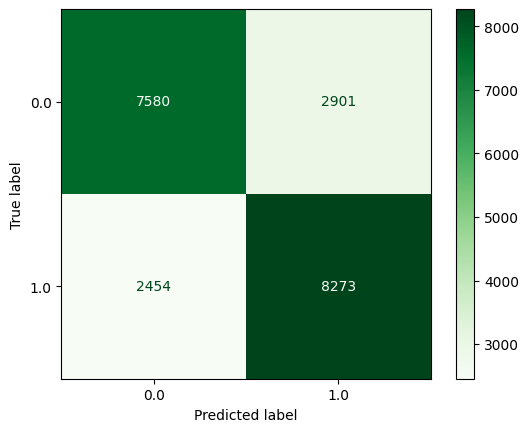

In [ ]:
# Matriz de confusión
fig = plt.figure(figsize=(9,9))
cm_lr = confusion_matrix(y_test2, y_test_pred2, labels=logistic_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_lr, display_labels=logistic_reg.classes_)
disp.plot(cmap='Greens')
plt.show()

In [ ]:
# Calcular la exactitud y precisión en el subconjunto de entrenamiento
train_accuracy2 = accuracy_score(y_train2, y_train_pred2)
train_precision2 = precision_score(y_train2, y_train_pred2)

# Calcular la exactitud y precisión en el subconjunto de prueba
test_accuracy2 = accuracy_score(y_test2, y_test_pred2)
test_precision2 = precision_score(y_test2, y_test_pred2)

print('La exactitud en train es:', train_accuracy2)
print('La precisión en train es:', train_precision2)
print('')
print('La exactitud en test es:', test_accuracy2)
print('La precisión en test es:', test_precision2)

La exactitud en train es: 0.7455339099506911
La precisión en train es: 0.734966592427617

La exactitud en test es: 0.7475009430403621
La precisión en test es: 0.7403794522999821


El modelo obtuvo una exactitud aproximada de 0.748 y una precisión de 0.740. La exactitud (74.8%) indica que el modelo predice correctamente la presencia o ausencia de diabetes en casi tres cuartas partes de los casos. La precisión de 74.0% sugiere que, de los casos predichos como positivos (diabetes), el modelo acierta en el 74% de ellos. Estos valores son razonablemente altos, considerando que superar el 70% en problemas de clasificación de salud puede ser un buen indicio de un modelo funcional, especialmente cuando se trata de datos reales y variables con cierta variabilidad. Por lo tanto, con estos resultados, se puede afirmar que el modelo ha funcionado de manera adecuada. La exactitud y precisión son lo suficientemente altas como para considerarlo un modelo que logra captar patrones relevantes en los datos, aunque puede haber margen de mejora.

## Comparación de modelos

In [ ]:
metricas = np.array([[test_accuracy1, test_precision1],[test_accuracy2, test_precision2]])
resumen = pd.DataFrame(metricas, columns = ['Exactitud', 'Precisión'], index = ['Bosque Aleatorio', 'Regresión Logística'])
print(resumen)

                     Exactitud  Precisión
Bosque Aleatorio      0.707375   0.717293
Regresión Logística   0.747501   0.740379


Tanto el modelo de bosque aleatorio como el de regresión logística han demostrado ser funcionales para la tarea de predicción de diabetes, logrando exactitudes y precisiones aceptables. La regresión logística parece ser una mejor opción, ya que obtuvo una exactitud y precisión ligeramente superiores, lo que sugiere que la relación entre las variables y el diagnóstico de diabetes podría estar mejor representada de forma lineal. No obstante, ambos modelos captan patrones significativos en los datos y podrían utilizarse dependiendo de la necesidad de interpretar el modelo (en el caso de la regresión logística) o de explorar mayor complejidad de relaciones (en el caso del bosque aleatorio).

## Conclusiones finales



*   La implementación de algoritmos de aprendizaje automático permitió constatar que el índice de masa corporal y la edad tienen un gran impacto en el diagnóstico de la diabetes, seguido por otros factores como el estado de salud general y la hipertensión. Estos resultados están en concordancia con la alta correlación que existe entre estas variables y la diabetes.
*   Tanto el modelo de bosque aleatorio como el de regresión logística han  logrado exactitudes y precisiones superiores al 70%, por lo cual se puede decir que funcionan razonablemente bien para predecir la diabetes. El bosque aleatorio presentó un valor ligeramente inferior en dichas métricas en comparación con la regresión logística; esto podría deberse a factores como que los datos no tienen tantas interacciones no lineales, o que el bosque aleatorio está más sujeto a la variabilidad de los datos en este caso particular.
*   Puesto que existen algunos factores que no tienen mucha incidencia sobre la variable objetivo (diabetes), es posible continuar haciendo una selección de características de manera iterativa, de tal forma que se descarten otras variables (además del consumo de alcohol que ya fue excluída), obteniéndose así un modelo más sencillo.